## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['with_mask', 'mask_weared_incorrect', 'without_mask']


[2994, 2994, 2994]


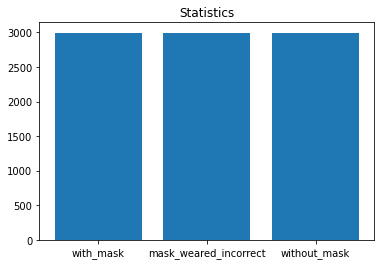

In [ ]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

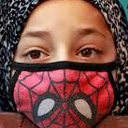

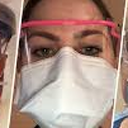

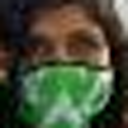

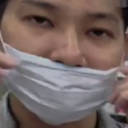

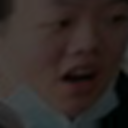

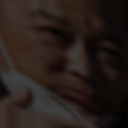

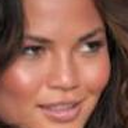

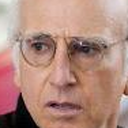

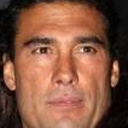

In [ ]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(3):
    img_loc = this_path + '/' + im_count[i]
    # print(img_loc)
    img = cv2.imread(img_loc)
    cv2_imshow(img)

In [ ]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(3):
    img_loc = this_path + '/' + im_count[i]
    # print(img_loc)
    img = plt.imread(img_loc)
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [ ]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
import numpy as np
shapes_x = []
shapes_y = []
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(2994):
    img_loc = this_path + '/' + im_count[i]
    # print(img_loc)
    img = plt.imread(img_loc)
    shapes_x.append(img.shape[0])
    shapes_y.append(img.shape[1])
print(np.unique(np.array(shapes_x)))
print(np.unique(np.array(shapes_y)))

[128]
[128]


In [ ]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it


# shapes_x = []
# shapes_y = []
# for label in output_classes:
#   this_path=path+label
#   dir=pathlib.Path(this_path)
#   im_count=os.listdir(dir)
#   for i in range(2994):
#     img_loc = this_path + '/' + im_count[i]
#     # print(img_loc)
#     img = plt.imread(img_loc)
#     shapes_x.append(img.shape[0])
#     shapes_y.append(img.shape[1])
# print(np.unique(np.array(shapes_x)))
# print(np.unique(np.array(shapes_y)))


# Above code checks for unique values of image shape, and since only one unique value (128) is found
# Hence proved all images are of the same shape 

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [7]:
# Choose and define base model
IMG_SHAPE = (128,128)+(3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model2 = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
# Print base model summary and have a look at the layers
base_model.summary()
base_model2.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [9]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
base_model.trainable = False
base_model2.trainable = False

In [10]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model = tf.keras.models.Sequential([
                                  base_model,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1)])
model2 = tf.keras.models.Sequential([
                                  base_model2,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1)])


In [ ]:
# Add the final output layer

In [11]:
# Compile you model (set the parameters like loss/optimizers/metrics)
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# Print your model's summary
model.summary()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,340,033
Trainable params: 82,049
Non-tra

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [13]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from keras.applications.mobilenet_v2 import preprocess_input # Change according to your base model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Your code 

In [14]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

In [15]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input2 = tf.keras.applications.vgg16.preprocess_input

In [16]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [17]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [18]:
# Your code
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

dataset = tf.keras.utils.image_dataset_from_directory(path,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 8982 files belonging to 3 classes.


In [19]:
val_batches = tf.data.experimental.cardinality(dataset)
validation_dataset = dataset.take(val_batches // 5)
train_dataset = dataset.skip(val_batches // 5)
# print(dataset)
print('%d' % tf.data.experimental.cardinality(train_dataset))
print('%d' % tf.data.experimental.cardinality(validation_dataset))

225
56


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [21]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 1280)


In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [23]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [24]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = data_augmentation(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model3 = tf.keras.Model(inputs, outputs)

In [ ]:
model4 = tf.keras.models.Sequential([inputs,
                                     rescale,
                                     data_augmentation,
                                  base_model,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(64, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1)])

In [ ]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 64)                81984     
                                                                 
 dropout_16 (Dropout)        (None, 64)               

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
base_learning_rate = 0.000001
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
initial_epochs = 10

# loss0, accuracy0 = model.evaluate(validation_dataset)
# loss0, accuracy0 = model2.evaluate(validation_dataset)
# loss0, accuracy0 = model4.evaluate(validation_dataset)
loss0, accuracy0 = model3.evaluate(validation_dataset)

56/56 [==============================] - 6s 60ms/step - loss: 0.5174 - accuracy: 0.3410


In [28]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
history = model3.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)


Epoch 1/10
225/225 [==============================] - 400s 2s/step - loss: 0.7433 - accuracy: 0.2790 - val_loss: 0.4865 - val_accuracy: 0.3298
Epoch 2/10
225/225 [==============================] - 19s 74ms/step - loss: 0.7147 - accuracy: 0.2798 - val_loss: 0.4553 - val_accuracy: 0.3292
Epoch 3/10
225/225 [==============================] - 19s 74ms/step - loss: 0.6773 - accuracy: 0.2734 - val_loss: 0.4193 - val_accuracy: 0.3365
Epoch 4/10
225/225 [==============================] - 21s 80ms/step - loss: 0.6320 - accuracy: 0.2773 - val_loss: 0.3907 - val_accuracy: 0.3443
Epoch 5/10
225/225 [==============================] - 20s 75ms/step - loss: 0.6055 - accuracy: 0.2807 - val_loss: 0.3658 - val_accuracy: 0.3398
Epoch 6/10
225/225 [==============================] - 19s 74ms/step - loss: 0.5643 - accuracy: 0.2847 - val_loss: 0.3407 - val_accuracy: 0.3438
Epoch 7/10
225/225 [==============================] - 19s 73ms/step - loss: 0.5298 - accuracy: 0.2815 - val_loss: 0.3143 - val_accuracy: 

### Evaluate the performance

In [1]:
# Plot training & validation loss/accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-10.0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'history' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report
validation_classes = []
validation_images = []
for i in range( -(-validation_label_generator.samples // validation_label_generator.batch_size)):
   batch = validation_label_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred, 
		target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']))


In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)